# Bayesian experimental design for Kepler-36

Suppose we would like to make a follow-up measurement on Kepler-36c (the more observable of the two planets in the system). How would we know the optimal time(s) to observe to decreaes uncertainties on the dynamical masses in the system? Because the sampling on TTV curves is often sparse and non-uniform, it can be difficult to quantify from first principles how much information you gain on the dynamical masses at any given epoch.

Here, we use Bayesian experimental design to solve this problem. Largely following Goldberg et al. (2018), we can *simulate* what the posteriors look like after a follow-up measurement is taken by rejection sampling our original posteriors. We can then quantify the difference between the old and new posteriors using the Kullback-Leibler Divergence, and use this as a metric to assess the expected information gain at each epoch.

ttvnest has a Bayesian experimental design module called 'followup' that does just that. Let's use it!

In [1]:
%matplotlib inline
import ttvnest
import numpy as np

kepler36 = ttvnest.io_utils.load_results('kepler36.p')

Let's check out the posterior summary and TTV plots again:

Summary (middle 95 percentile): 
$M_1/M_\star/3\times10^{-6}$: $4.030686^{+0.125817}_{-0.136883}$
$P_1\ [\mathrm{days}]$: $13.839197^{+0.000523}_{-0.000518}$
$\sqrt{e}_1\cos(\omega_1)$: $0.045735^{+0.048222}_{-0.030362}$
$\sqrt{e}_1\sin(\omega_1)$: $0.189233^{+0.020419}_{-0.010774}$
$T_{0,1}\ [\mathrm{days}]$: $7.959119^{+0.008336}_{-0.008183}$
$M_2/M_\star/3\times10^{-6}$: $7.309738^{+0.184197}_{-0.159146}$
$P_2\ [\mathrm{days}]$: $16.239654^{+0.00036}_{-0.000403}$
$\sqrt{e}_2\cos(\omega_2)$: $0.036294^{+0.06204}_{-0.054425}$
$\sqrt{e}_2\sin(\omega_2)$: $0.09211^{+0.031831}_{-0.02035}$
$T_{0,2}\ [\mathrm{days}]$: $2.913044^{+0.001673}_{-0.001708}$


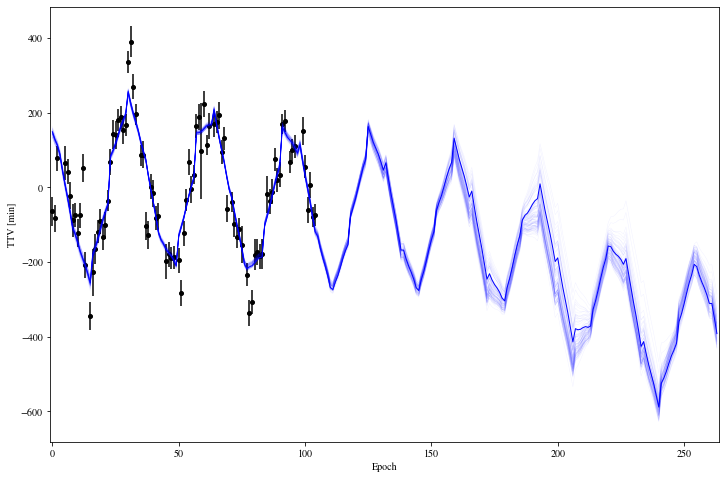

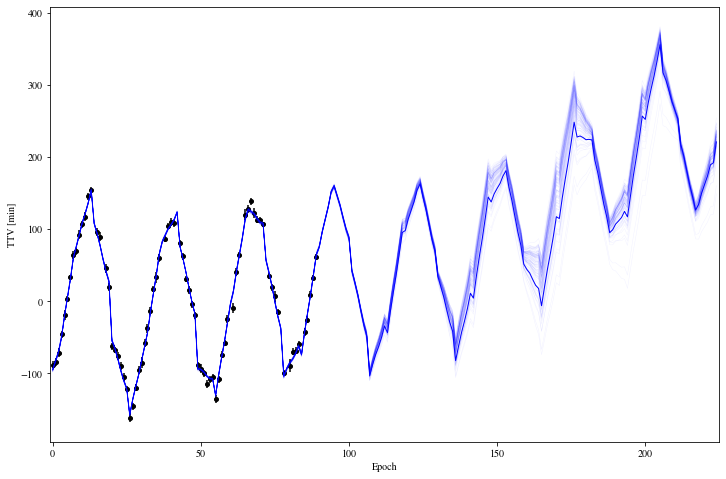

In [2]:
kepler36.posterior_summary()
ttvnest.plot_utils.plot_results(kepler36, uncertainty_curves = 100, 
                                sim_length = 365.25*10)

Now, let's do some Bayesian experimental design! 

In [3]:
measurement_uncertainty = 4./1440 #about as good as Kepler
measured_planet = 2 #one-indexed

info = ttvnest.followup.calculate_information_timeseries(
        kepler36, measurement_uncertainty, measured_planet)

  0%|          | 8/119579 [00:00<27:25, 72.66it/s]

Propogating all models in posterior forward to time 7305.0...


  0%|          | 0/450 [00:00<?, ?it/s]

Calculating the Kullback-Leibler Divergence distribution at each epoch...


100%|██████████| 450/450 [4:37:50<00:00, 43.84s/it]  


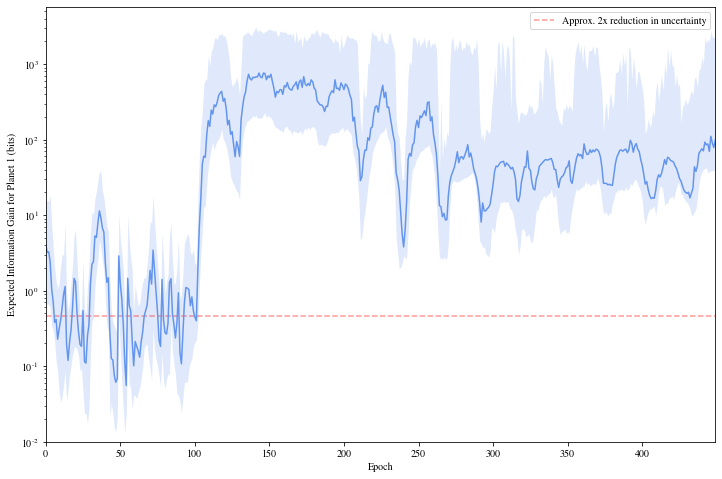

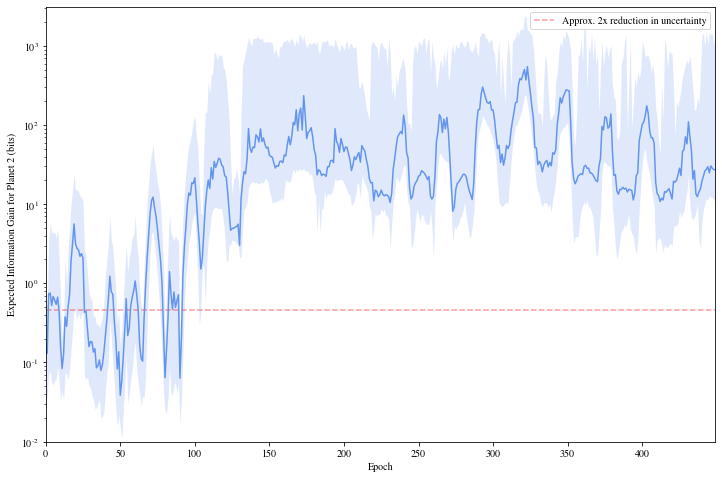

In [4]:
ttvnest.plot_utils.plot_information_timeseries(info)